# 1. Import Liblary

In [102]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pydotplus
import sklearn.tree as tree
import sklearn.linear_model as linear_model

from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn import preprocessing
from sklearn import linear_model
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn import svm
from sklearn.model_selection import GridSearchCV

# 2. Import dataset

    # Dataset Bank additional (Data terbaru)

In [2]:
# Data Train
add_train = pd.read_csv('dataset bank/bank-additional/bank-additional-full.csv', delimiter=";")
add_train.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
add_train.shape

(41188, 21)

In [4]:
add_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [5]:
# Data Test
add_test = pd.read_csv('dataset bank/bank-additional/bank-additional.csv', delimiter=";")
add_test.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no
5,32,services,single,university.degree,no,no,no,cellular,sep,thu,...,3,999,2,failure,-1.1,94.199,-37.5,0.884,4963.6,no
6,32,admin.,single,university.degree,no,yes,no,cellular,sep,mon,...,4,999,0,nonexistent,-1.1,94.199,-37.5,0.879,4963.6,no
7,41,entrepreneur,married,university.degree,unknown,yes,no,cellular,nov,mon,...,2,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no
8,31,services,divorced,professional.course,no,no,no,cellular,nov,tue,...,1,999,1,failure,-0.1,93.200,-42.0,4.153,5195.8,no
9,35,blue-collar,married,basic.9y,unknown,no,no,telephone,may,thu,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no


In [6]:
add_test.shape

(4119, 21)

In [7]:
add_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4119 non-null   int64  
 1   job             4119 non-null   object 
 2   marital         4119 non-null   object 
 3   education       4119 non-null   object 
 4   default         4119 non-null   object 
 5   housing         4119 non-null   object 
 6   loan            4119 non-null   object 
 7   contact         4119 non-null   object 
 8   month           4119 non-null   object 
 9   day_of_week     4119 non-null   object 
 10  duration        4119 non-null   int64  
 11  campaign        4119 non-null   int64  
 12  pdays           4119 non-null   int64  
 13  previous        4119 non-null   int64  
 14  poutcome        4119 non-null   object 
 15  emp.var.rate    4119 non-null   float64
 16  cons.price.idx  4119 non-null   float64
 17  cons.conf.idx   4119 non-null   f

# 3. Data Cleaning
    Pengecekan dataset terhadap data missing value dan/atau data duplikat. 

In [8]:
# Mengecek presentase missing value pada dataset add_train
add_train.replace(' ',np.nan, inplace=True)
add_train.isna().sum() /len(add_train) *100

age               0.0
job               0.0
marital           0.0
education         0.0
default           0.0
housing           0.0
loan              0.0
contact           0.0
month             0.0
day_of_week       0.0
duration          0.0
campaign          0.0
pdays             0.0
previous          0.0
poutcome          0.0
emp.var.rate      0.0
cons.price.idx    0.0
cons.conf.idx     0.0
euribor3m         0.0
nr.employed       0.0
y                 0.0
dtype: float64

In [9]:
# Mengecek apakah terdapat data duplikat pada dataset add_train
add_train.duplicated().sum()

12

In [10]:
# Menghapus data duplikat
add_train = add_train.drop_duplicates(keep = 'first')
add_train.duplicated().sum()

0

In [11]:
# Mengecek presentase missing value pada dataset add_test
add_test.replace(' ',np.nan, inplace=True)
add_test.isna().sum() /len(add_test) *100

age               0.0
job               0.0
marital           0.0
education         0.0
default           0.0
housing           0.0
loan              0.0
contact           0.0
month             0.0
day_of_week       0.0
duration          0.0
campaign          0.0
pdays             0.0
previous          0.0
poutcome          0.0
emp.var.rate      0.0
cons.price.idx    0.0
cons.conf.idx     0.0
euribor3m         0.0
nr.employed       0.0
y                 0.0
dtype: float64

In [12]:
# Mengecek apakah terdapat data duplikat pada dataset add_test
add_test.duplicated().sum()

0

In [13]:
# Mengelompokkan kolom berdasarkan tipe data
numerical = ['age', 'duration','campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
categorical = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
features = ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration','campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
boolean = ['y']

    Dataset sudah tidak memiliki missing value dan data duplikat.

# 4. Visualisasi Data
    Memvisualisasikan data pelanggan yang memutuskan untuk berlangganan deposito jangka panjang ['y']. 

In [14]:
# Menghitung jumlah keputusan pelanggan pada kolom y dalam persentase
subs = add_train['y'].value_counts(normalize = True)*100

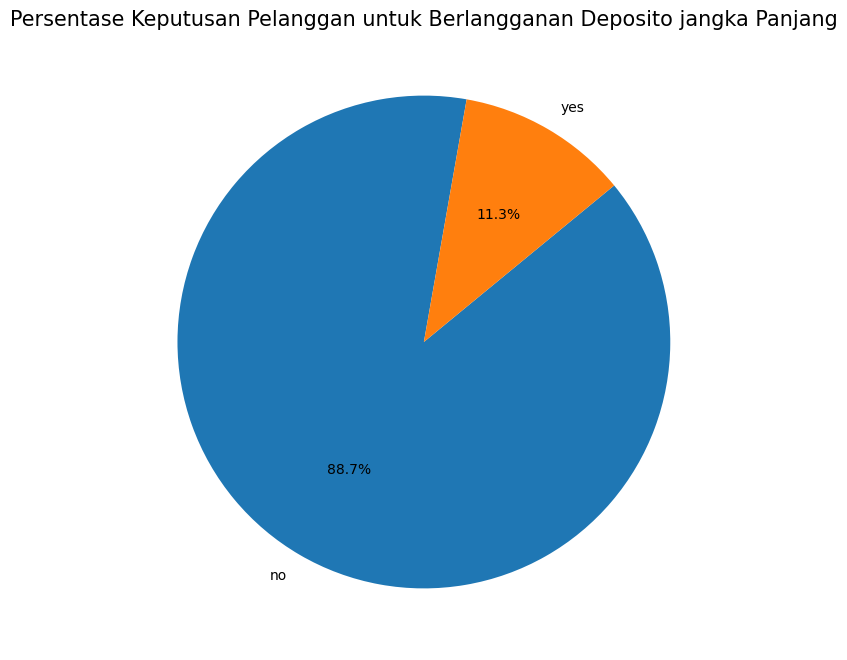

In [15]:
# Memvisualisasi data dengan pie chart
plt.figure(figsize=(8,8))
font = {'weight': 'bold','size': 15,}
ax = plt.axes()
plt.pie(subs, labels=add_train['y'].unique(), startangle=80, autopct='%1.1f%%')
plt.title('Persentase Keputusan Pelanggan untuk Berlangganan Deposito jangka Panjang', size = 15)
plt.show()

Dari chart yang telah ditampilkan, dapat disimpulkan bahwa sebesat 88.7% pelanggan tidak tertark untuk berlangganan deposito berjangka pada bank. Namun sebesar 11.3% menerima penawaran tersebut. 

    Memvisualisasikan umur pelanggan yang menerima penawaran deposito berjangka bank. 

In [16]:
# Sllicing dataset add_train['y'] == 'yes'
subs_yes = add_train[add_train['y']=='yes']
subs_yes

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
75,41,blue-collar,divorced,basic.4y,unknown,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
83,49,entrepreneur,married,university.degree,unknown,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
88,49,technician,married,basic.9y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
129,41,technician,married,professional.course,unknown,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
139,45,blue-collar,married,basic.9y,unknown,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41174,62,retired,married,university.degree,no,yes,no,cellular,nov,thu,...,1,1,6,success,-1.1,94.767,-50.8,1.031,4963.6,yes
41178,62,retired,married,university.degree,no,no,no,cellular,nov,thu,...,2,6,3,success,-1.1,94.767,-50.8,1.031,4963.6,yes
41181,37,admin.,married,university.degree,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


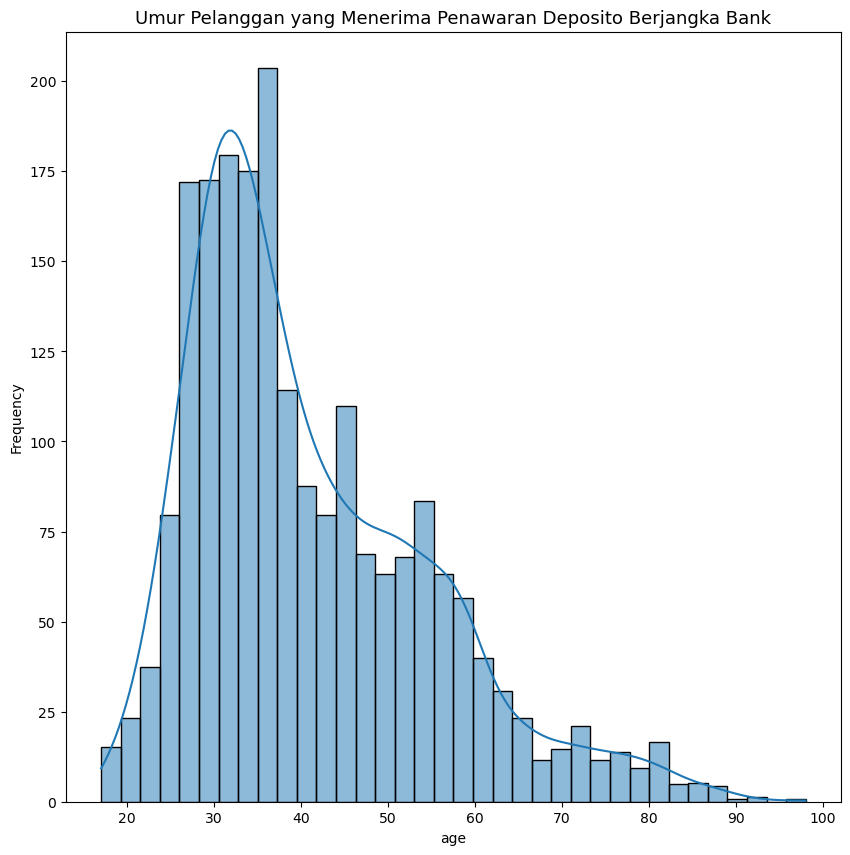

In [17]:
# Memvisualisasi data dengan histplot
plt.figure(figsize=(10,10))
sns.histplot(subs_yes['age'],kde=True, stat="frequency")
plt.title('Umur Pelanggan yang Menerima Penawaran Deposito Berjangka Bank', size=13)
plt.show()

Dari visualisasi data tersebut, dapat disimpulkan bahwa pelanggan terbanyak yang menerima penawaran deposito berjangka kisaran umur 30 hingga 40 tahun. Rata rata umur pelanggan yang tertarik dengan penawaran tersebut tergolong usia produktif. 

# 5. Data Preprocessing

In [18]:
# Mengubah tipe data categorical dan boolean menjadi numerik
le = preprocessing.LabelEncoder()

for col in categorical:
    add_train[col] = le.fit_transform(add_train[col])
    add_test[col] = le.fit_transform(add_test[col])

for col in boolean:
    add_train[col] = le.fit_transform(add_train[col])
    add_test[col] = le.fit_transform(add_test[col])

In [19]:
add_train.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,3,1,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,0,2,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,1,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,3,0,0,2,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
5,45,7,1,2,1,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
6,59,0,1,5,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
7,41,1,1,7,1,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
8,24,9,2,5,0,2,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
9,25,7,2,3,0,2,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0


In [20]:
add_test.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,1,1,2,0,2,0,0,6,0,...,2,999,0,1,-1.8,92.893,-46.2,1.313,5099.1,0
1,39,7,2,3,0,0,0,1,6,0,...,4,999,0,1,1.1,93.994,-36.4,4.855,5191.0,0
2,25,7,1,3,0,2,0,1,4,4,...,1,999,0,1,1.4,94.465,-41.8,4.962,5228.1,0
3,38,7,1,2,0,1,1,1,4,0,...,3,999,0,1,1.4,94.465,-41.8,4.959,5228.1,0
4,47,0,1,6,0,2,0,0,7,1,...,1,999,0,1,-0.1,93.200,-42.0,4.191,5195.8,0
5,32,7,2,6,0,0,0,0,9,2,...,3,999,2,0,-1.1,94.199,-37.5,0.884,4963.6,0
6,32,0,2,6,0,2,0,0,9,1,...,4,999,0,1,-1.1,94.199,-37.5,0.879,4963.6,0
7,41,2,1,6,1,2,0,0,7,1,...,2,999,0,1,-0.1,93.200,-42.0,4.191,5195.8,0
8,31,7,0,5,0,0,0,0,7,3,...,1,999,1,0,-0.1,93.200,-42.0,4.153,5195.8,0
9,35,1,1,2,1,0,0,1,6,2,...,1,999,0,1,1.1,93.994,-36.4,4.855,5191.0,0


    ['y'] : 0 (No)
    ['y'] : 1 (Yes)

In [21]:
# Menentukan x_train dan y_train
x_array = add_train[features].to_numpy()
x_train = x_array

y_array = add_train['y'].astype('int').to_numpy()
y_train = y_array

In [22]:
# Menentukan x_test dan y_test
x_array2 = add_test[features].to_numpy()
x_test = x_array2

y_array2 = add_test['y'].astype('int').to_numpy()
y_test = y_array2

In [42]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

# 6. Data Classification
   ## 6.1 Logistic Regression

In [45]:
# Memodelkan logistic regression
reg = linear_model.LogisticRegression(solver='liblinear', C=0.05, multi_class='ovr', random_state=1)
reg.fit(x_train, y_train)
y_pred = reg.predict(x_test)

print(classification_report(y_test, y_pred))
print('Accurancy:', metrics.accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95      3668
           1       0.67      0.41      0.51       451

    accuracy                           0.91      4119
   macro avg       0.80      0.69      0.73      4119
weighted avg       0.90      0.91      0.90      4119

Accurancy: 0.9130857004127215


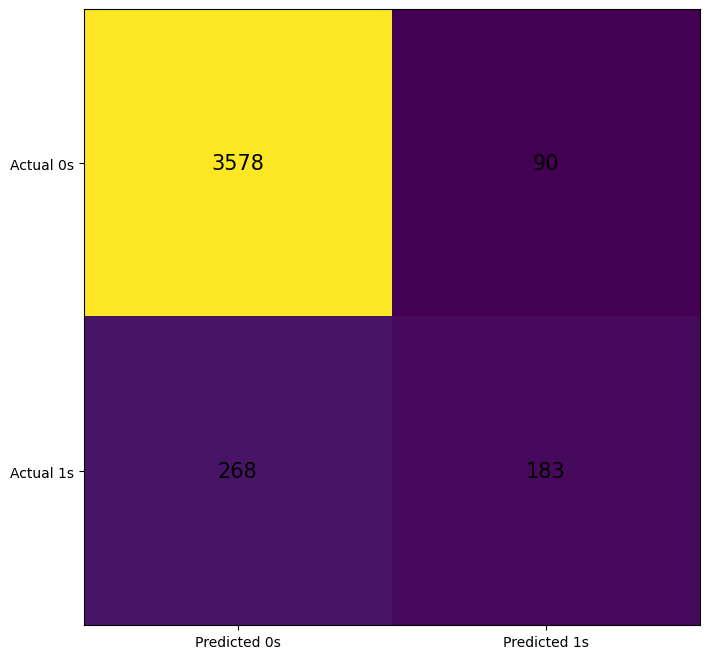

In [46]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

fig, ax= plt.subplots(figsize=(8,8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='black', size=15)

plt.show()

## 6.2 K-Nearest Neighbors

In [47]:
knn = KNeighborsClassifier(n_neighbors = 15)
knn.fit(x_train, y_train)
y_pred2 = knn.predict(x_test)

print(classification_report(y_test, y_pred2))
print('Accurancy:', metrics.accuracy_score(y_test, y_pred2))

C:\Users\KARINA\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


              precision    recall  f1-score   support

           0       0.93      0.98      0.95      3668
           1       0.71      0.40      0.52       451

    accuracy                           0.92      4119
   macro avg       0.82      0.69      0.74      4119
weighted avg       0.91      0.92      0.91      4119

Accurancy: 0.9169701383831027


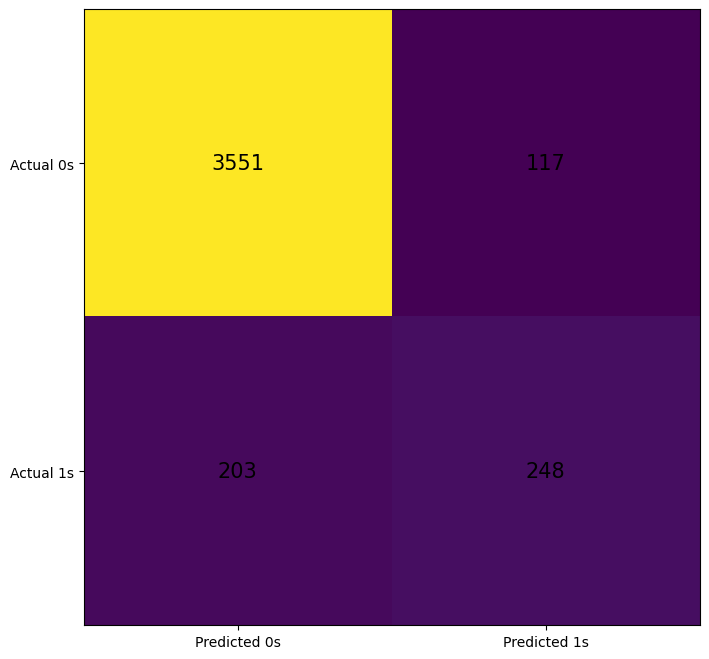

In [27]:
# Confusion matrix KNN
cm = confusion_matrix(y_test, y_pred2)

fig, ax= plt.subplots(figsize=(8,8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='black', size=15)

plt.show()

## 6.3 Naive Bayes

In [44]:
# Membuat model Naive Bayes
gnb = GaussianNB()
gnb.fit(x_train, y_train)
y_pred3 = gnb.predict(x_test)

print(classification_report(y_test, y_pred3))
print('Accurancy:', metrics.accuracy_score(y_test, y_pred3))

              precision    recall  f1-score   support

           0       0.95      0.88      0.91      3668
           1       0.38      0.61      0.47       451

    accuracy                           0.85      4119
   macro avg       0.66      0.74      0.69      4119
weighted avg       0.89      0.85      0.86      4119

Accurancy: 0.848264141781986


## 6.4 Decision Tree

In [43]:
# Membuat model decision Tree
clf = DecisionTreeClassifier()
clf = clf.fit(x_train, y_train)
y_pred4 = clf.predict(x_test)

print(classification_report(y_test, y_pred4))
print('Accurancy:', metrics.accuracy_score(y_test, y_pred4))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      3668
           1       0.82      0.80      0.81       451

    accuracy                           0.96      4119
   macro avg       0.90      0.89      0.89      4119
weighted avg       0.96      0.96      0.96      4119

Accurancy: 0.9587278465647001


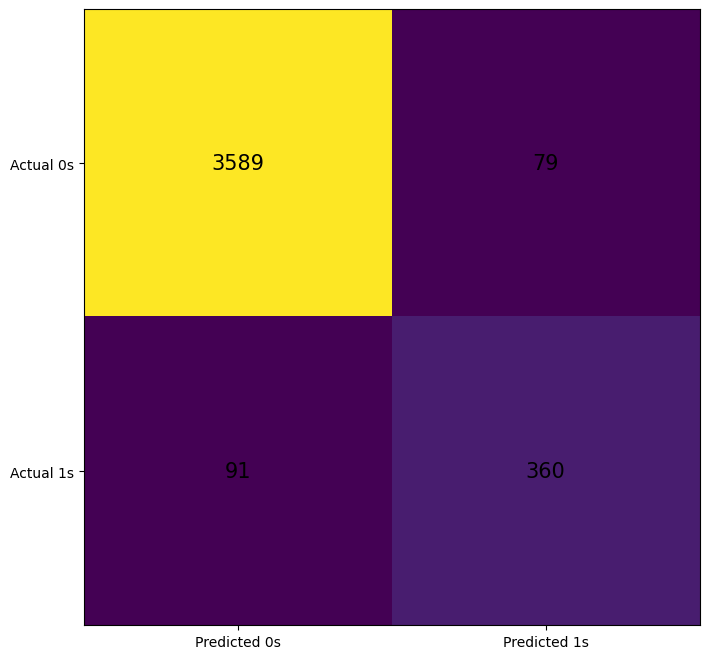

In [106]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred4)

fig, ax= plt.subplots(figsize=(8,8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='black', size=15)

plt.show()

In [89]:
# Optimalisasi Decision Tree clasifier
clf2 = DecisionTreeClassifier(criterion = 'gini', max_depth = 4)
clf2 = clf2.fit(x_train, y_train)
clf2_pred = clf2.predict(x_test)

print(classification_report(y_test, clf2_pred))
print('Accurancy:', metrics.accuracy_score(y_test, clf2_pred))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      3668
           1       0.62      0.53      0.57       451

    accuracy                           0.91      4119
   macro avg       0.78      0.74      0.76      4119
weighted avg       0.91      0.91      0.91      4119

Accurancy: 0.9126001456664239


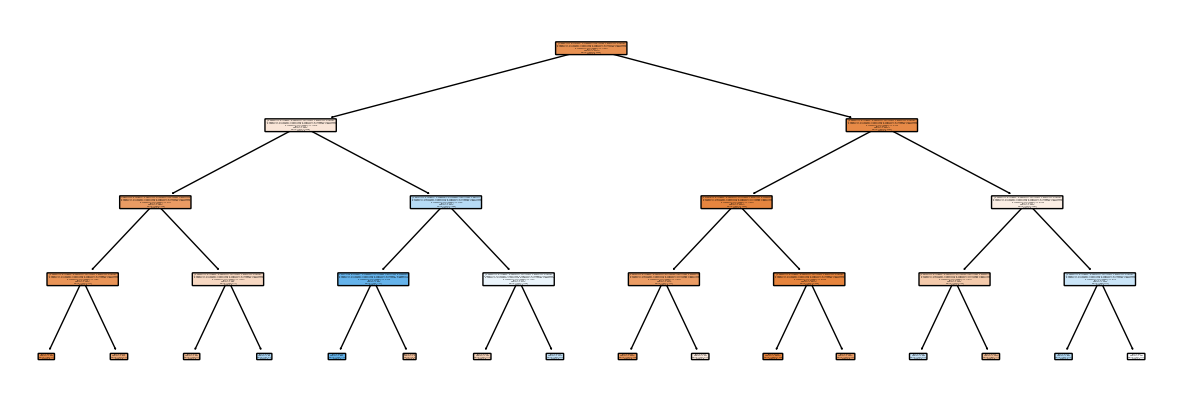

In [90]:
plt.figure(figsize=(15, 5))
tree.plot_tree(clf2,
               class_names = ['0', '1'],
               feature_names = x_train,
               filled=True, rounded = True)
plt.show()

## 6.5 Random Forest 

In [91]:
# Membuat model Random Forest Classifier
rnd = RandomForestClassifier(n_estimators = 100)
rnd.fit(x_train, y_train)
y_pred5 = rnd.predict(x_test)

print(classification_report(y_test, y_pred5))
print('Accurancy:', metrics.accuracy_score(y_test, y_pred5))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      3668
           1       0.99      0.95      0.97       451

    accuracy                           0.99      4119
   macro avg       0.99      0.97      0.98      4119
weighted avg       0.99      0.99      0.99      4119

Accurancy: 0.9936877882981306


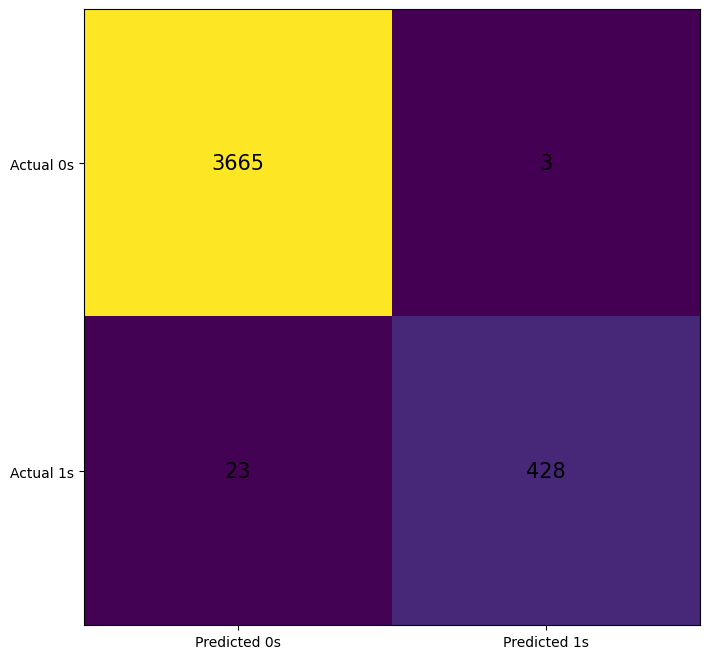

In [104]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred5)

fig, ax= plt.subplots(figsize=(8,8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='black', size=15)

plt.show()

## 6.6 Support Vector Machine

In [103]:
# Membuat model SVM
svm= svm.SVC(kernel='linear')
svm.fit(x_train, y_train)
y_pred6 = svm.predict(x_test)

print(classification_report(y_test, y_pred6))
print('Accurancy:', metrics.accuracy_score(y_test, y_pred6))
print('Precision:', metrics.precision_score(y_test, y_pred6))
print('Recall:', metrics.recall_score(y_test, y_pred6))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95      3668
           1       0.65      0.31      0.42       451

    accuracy                           0.91      4119
   macro avg       0.79      0.65      0.69      4119
weighted avg       0.89      0.91      0.89      4119

Accurancy: 0.9065307113377034
Precision: 0.6513761467889908
Recall: 0.3148558758314856


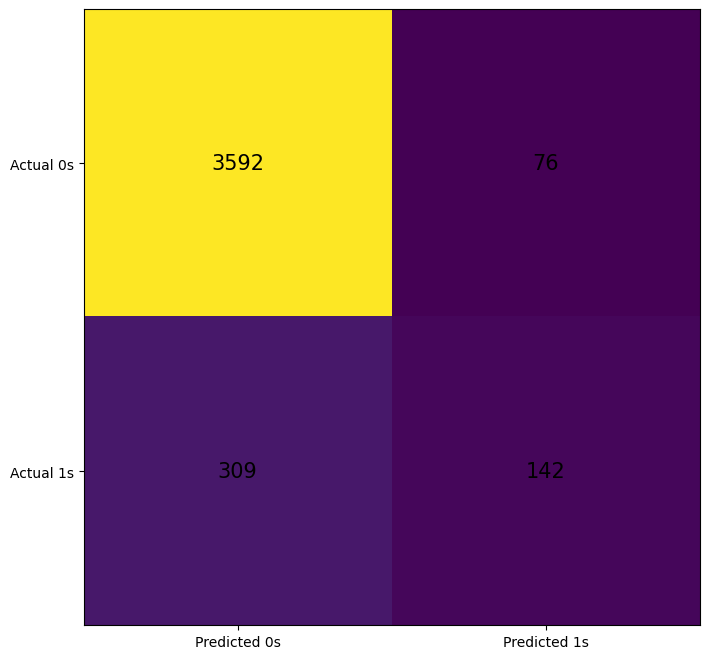

In [105]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred6)

fig, ax= plt.subplots(figsize=(8,8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='black', size=15)

plt.show()

# 7. Kesimpulan Analisis

Dari hasil analisis data, dapat disimpulkan: 
1. Bahwa sebesar 88.7% pelanggan tidak tertarik untuk berlangganan deposito berjangka pada bank. Namun sebesar 11.3% menerima penawaran tersebut. Sehingga perlu dilakukan teknik marketing lain untuk melakukan penawaran selain melalui panggilan telepon. 
2. Rata-rata umur pelanggan yang tertarik pada penawaran bank adalah tergolong usia poduktif, hal tersebut dapat sebabkan banyak faktor yang mendukung untuk melakukan deposito berjangka. 
3. Dari prediksi menggunakan beberapa algoritma klasifikasi didapat hasil, bahwa menggunakan algoritma Random Forest menghasilkan keakuratan sebesar 99,4%. Algoritma ini lebih akurat untuk memprediksi apakah nasabah tertarik dengan penawaran bank yang dilakukan dengan teknik panggilan telepon.
4. Pada Confusion Matrix di atas menunjukkan hasil sebagai berikut:
    - Prediksi true negatif(atas sisi kiri) : Data prediksi benar sebagai nol
    - Prediksi false negatif(bawah sisi kiri): Data prediksi salah sebagai nol.
    - Prediksi false positif(atas sisi kanan): Data prediksi salah sebagai satu.
    - Prediksi true positif(bawah sisi kanan): Data prediksi benar sebagai satu.
    Sehingga dapat diprediksi jumlah pelanggan yang tertarik maupun tidak tertarik dengan penawaran bank. 